In [32]:
from catboost import CatBoostRegressor

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, make_scorer, r2_score

In [33]:
final_data = pd.read_csv("data/wrangled_data.csv")

In [34]:
del final_data['date_caught']

In [35]:
# Select X and y features
X = final_data.drop(['capture_number'], axis = 1)
y = final_data['capture_number']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Check the shape of the data sets
print("X_train:", X_train.shape)  
print("y_train:", y_train.shape)  
print("X_test:", X_test.shape) 
print("y_test:", y_test.shape)  

X_train: (12643, 40)
y_train: (12643,)
X_test: (5419, 40)
y_test: (5419,)


In [36]:
def evaluate_rmse(y_true, y_pred, ndigits=3):
    """ Prints the RMSE (root mean squared error) of y_pred in relation to y_true"""
    rmse = mean_squared_error(y_true, y_pred, squared=False )
    print("Number of predictions: ", len(y_pred))
    print("RMSE: ", round(rmse, ndigits))
    return rmse

In [37]:
# Instantiate model
model = CatBoostRegressor(n_estimators=20000,
                            random_state = 42,
                            objective='RMSE',
                            #task_type = 'GPU',
                            #bagging_temperature=0.1,
                            l2_leaf_reg=5,
                            depth=5)

In [38]:
# Initialize the CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=10000,  # Number of boosting iterations
                                   depth=6,          # Depth of the trees
                                   learning_rate=0.1,  # Learning rate
                                   loss_function='RMSE',  # Loss function for regression
                                   verbose=100)     # Print progress every 100 iterations


In [44]:
model.fit(X_train, y_train)

0:	learn: 3.9240665	total: 5.62ms	remaining: 1m 52s
1:	learn: 3.8993170	total: 9.47ms	remaining: 1m 34s
2:	learn: 3.8674638	total: 13.1ms	remaining: 1m 27s
3:	learn: 3.8387384	total: 17.5ms	remaining: 1m 27s
4:	learn: 3.8083300	total: 22.6ms	remaining: 1m 30s
5:	learn: 3.7832751	total: 26.2ms	remaining: 1m 27s
6:	learn: 3.7514644	total: 30.2ms	remaining: 1m 26s
7:	learn: 3.7211314	total: 35.5ms	remaining: 1m 28s
8:	learn: 3.7032227	total: 40.9ms	remaining: 1m 30s
9:	learn: 3.6823245	total: 44.7ms	remaining: 1m 29s
10:	learn: 3.6610698	total: 49.6ms	remaining: 1m 30s
11:	learn: 3.6451955	total: 55.9ms	remaining: 1m 33s
12:	learn: 3.6268478	total: 62.3ms	remaining: 1m 35s
13:	learn: 3.6090480	total: 90.1ms	remaining: 2m 8s
14:	learn: 3.5879852	total: 94.9ms	remaining: 2m 6s
15:	learn: 3.5648730	total: 102ms	remaining: 2m 7s
16:	learn: 3.5481206	total: 108ms	remaining: 2m 6s
17:	learn: 3.5343504	total: 114ms	remaining: 2m 6s
18:	learn: 3.5227068	total: 120ms	remaining: 2m 5s
19:	learn: 3.

In [45]:
# Make predictions on the test data
y_pred2 = model.predict(X_test) 

In [46]:
# evaluate
error = evaluate_rmse(y_test, y_pred2)

Number of predictions:  5419
RMSE:  1.773


In [47]:
r2_score(y_test, y_pred2)

0.8004672346300931

In [40]:
# Fit the model to the training data
catboost_model.fit(X_train, y_train)

0:	learn: 3.8362884	total: 5.96ms	remaining: 59.6s
100:	learn: 2.5583566	total: 568ms	remaining: 55.7s
200:	learn: 2.2855919	total: 1.09s	remaining: 53.4s
300:	learn: 2.1049836	total: 1.67s	remaining: 53.8s
400:	learn: 1.9654973	total: 2.21s	remaining: 52.9s
500:	learn: 1.8685698	total: 2.72s	remaining: 51.6s
600:	learn: 1.7952126	total: 3.24s	remaining: 50.7s
700:	learn: 1.7321538	total: 3.9s	remaining: 51.7s
800:	learn: 1.6735817	total: 4.45s	remaining: 51.1s
900:	learn: 1.6236118	total: 4.95s	remaining: 50s
1000:	learn: 1.5768102	total: 5.49s	remaining: 49.3s
1100:	learn: 1.5334876	total: 6.1s	remaining: 49.3s
1200:	learn: 1.4956193	total: 6.64s	remaining: 48.6s
1300:	learn: 1.4628521	total: 7.19s	remaining: 48.1s
1400:	learn: 1.4264460	total: 7.71s	remaining: 47.4s
1500:	learn: 1.3927820	total: 8.25s	remaining: 46.7s
1600:	learn: 1.3638343	total: 8.74s	remaining: 45.9s
1700:	learn: 1.3335575	total: 9.26s	remaining: 45.2s
1800:	learn: 1.3064147	total: 9.77s	remaining: 44.5s
1900:	le

In [41]:
# Make predictions on the test data
y_pred = catboost_model.predict(X_test)  

In [42]:
# evaluate
error = evaluate_rmse(y_test, y_pred)

Number of predictions:  5419
RMSE:  1.641


In [43]:
r2_score(y_test, y_pred) 

0.8290501260731356

Catboost looks pretty good, hyperparamter-optimization with randomizedsearchCV:

In [26]:
param_grid = {
    'iterations': [100, 500, 1000, 10000],    # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [6, 8, 10],               # Depth of the trees
    'l2_leaf_reg': [1, 3, 5],          # L2 regularization term
    'border_count': [32, 64, 128],     # Number of splits for numerical features
    'loss_function': ['RMSE'],   # Loss function for regression
    'verbose': [100],                  # Print progress every 100 iterations
}

In [27]:
from sklearn.model_selection import RandomizedSearchCV

catboost_model = CatBoostRegressor()

random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_grid, cv=5, n_jobs=-1)
random_search.fit(X_train, y_train)

0:	learn: 3.7012910	total: 11.7ms	remaining: 1m 56s
100:	learn: 2.2545067	total: 718ms	remaining: 1m 10s
200:	learn: 1.9499363	total: 1.51s	remaining: 1m 13s
300:	learn: 1.7636411	total: 2.15s	remaining: 1m 9s
400:	learn: 1.6362527	total: 2.74s	remaining: 1m 5s
500:	learn: 1.5389803	total: 3.38s	remaining: 1m 4s
600:	learn: 1.4547509	total: 4.01s	remaining: 1m 2s
700:	learn: 1.3804581	total: 4.61s	remaining: 1m 1s
800:	learn: 1.3121332	total: 5.25s	remaining: 1m
900:	learn: 1.2533495	total: 5.87s	remaining: 59.3s
1000:	learn: 1.1948444	total: 6.55s	remaining: 58.9s
1100:	learn: 1.1465698	total: 7.13s	remaining: 57.6s
1200:	learn: 1.0971433	total: 7.72s	remaining: 56.6s
1300:	learn: 1.0545398	total: 8.27s	remaining: 55.3s
1400:	learn: 1.0192347	total: 8.84s	remaining: 54.2s
1500:	learn: 0.9874412	total: 9.4s	remaining: 53.2s
1600:	learn: 0.9568781	total: 9.97s	remaining: 52.3s
1700:	learn: 0.9295348	total: 10.5s	remaining: 51.5s
1800:	learn: 0.8980863	total: 11.1s	remaining: 50.6s
1900:

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x00000236665E7D50>,
                   n_jobs=-1,
                   param_distributions={'border_count': [32, 64, 128],
                                        'depth': [6, 8, 10],
                                        'iterations': [100, 500, 1000, 10000],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'loss_function': ['RMSE'],
                                        'verbose': [100]})

In [28]:
# Get the best parameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_
best_params

{'verbose': 100,
 'loss_function': 'RMSE',
 'learning_rate': 0.2,
 'l2_leaf_reg': 1,
 'iterations': 10000,
 'depth': 6,
 'border_count': 128}

In [29]:
y_pred = best_estimator.predict(X_test) 

In [30]:
# evaluate
error = evaluate_rmse(y_test, y_pred) 

Number of predictions:  5419
RMSE:  1.718


## Error analysis:

In [52]:
def error_analysis(y_test, y_pred):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    ax[0].set_xlim((y_pred.min()-10), (y_pred.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    ax[1].set_xlim((y_pred.min()-10), (y_pred.max()+10))
    ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

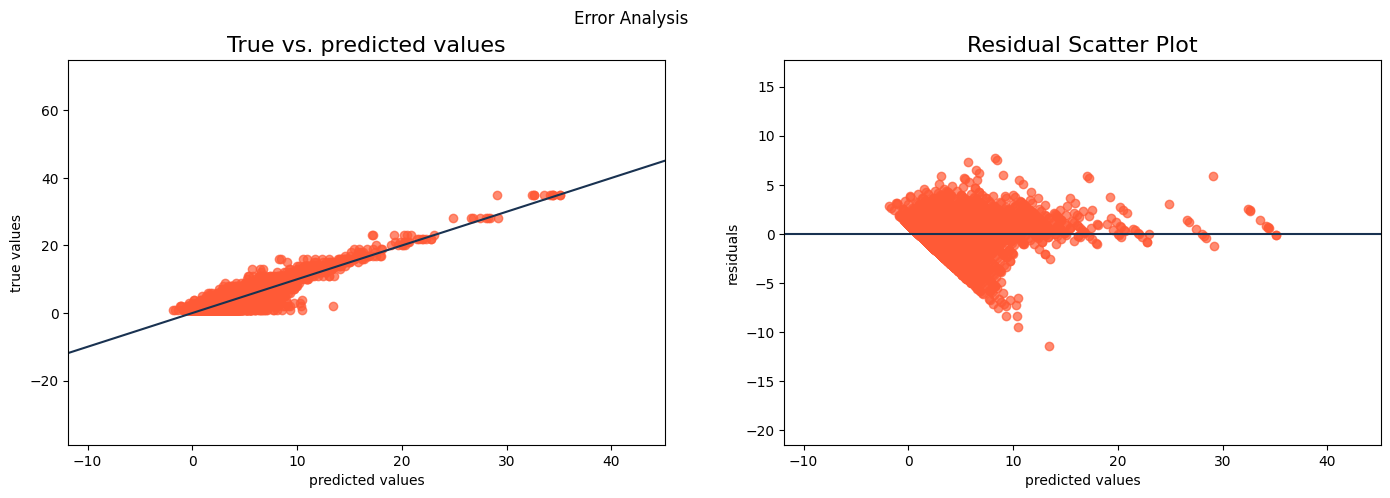

In [53]:
error_analysis(y_test, y_pred)

Since

Residual = Observed – Predicted

…positive values for the residual (on the y-axis) mean the prediction was too low, and negative values mean the prediction was too high; 0 means the guess was exactly correct.

Optimally the residuals,
- (1) are pretty symmetrically distributed, tending to cluster towards the middle of the plot.
- (2) they’re clustered around the lower single digits of the y-axis (e.g., 0.5 or 1.5, not 30 or 150).
- (3) in general, there aren’t any clear patterns.


-> This looks pretty good


